<a href="https://colab.research.google.com/github/afrahshaikh/edgedetection/blob/main/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

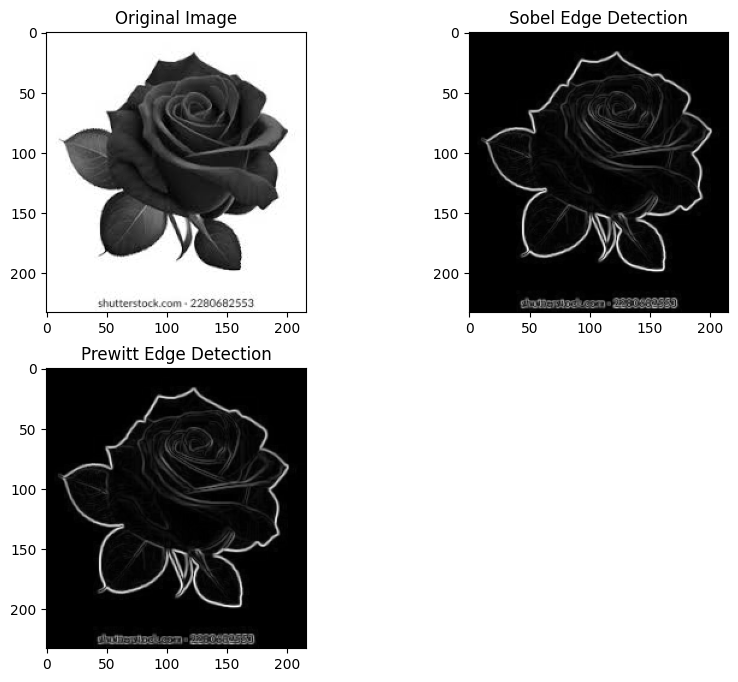

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('images.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if image is None:
    raise ValueError("Image not found. Please check the path.")

# Apply Sobel filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel = cv2.magnitude(sobel_x, sobel_y)  # Combine both directions

# Apply Prewitt filter
# Prewitt kernel for horizontal and vertical edges
prewitt_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

# Convolve with the image
prewitt_x_edges = cv2.filter2D(image, cv2.CV_64F, prewitt_x)
prewitt_y_edges = cv2.filter2D(image, cv2.CV_64F, prewitt_y)

# Ensure the same type for magnitude calculation
prewitt_x_edges = prewitt_x_edges.astype(np.float64)
prewitt_y_edges = prewitt_y_edges.astype(np.float64)

# Calculate the magnitude of Prewitt edges
prewitt = cv2.magnitude(prewitt_x_edges, prewitt_y_edges)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 2, 2), plt.imshow(sobel, cmap='gray'), plt.title('Sobel Edge Detection')
plt.subplot(2, 2, 3), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt Edge Detection')
plt.show()

